In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json


def totalvolPlot(file_name, title_name):
    df = pd.read_csv(file_name)
    
    # Convert 'time' to hours
    df['Hours'] = df['time'].apply(lambda t: int(t[:2]) + int(t[3:5])/60)
    
    # Aggregate: mean and standard error per hour
    df_agg = df.groupby('Hours')['TotalVol'].agg(['mean', 'sem']).reset_index()
    # 'sem' = standard error of the mean
    
    # Plot mean line
    plt.figure(figsize=(20, 8))
    plt.plot(df_agg['Hours'], df_agg['mean'], color='#2E86C1', marker='o', linestyle='-')
    
    # Plot confidence interval (mean ± 1.96*sem for 95% CI)
    ci = 1.96 * df_agg['sem']
    plt.fill_between(df_agg['Hours'], df_agg['mean'] - ci, df_agg['mean'] + ci,
                     color='#2E86C1', alpha=0.2)
    
    # Labels, limits, grid
    plt.title(title_name, fontsize=16)
    plt.xlabel("Hours", fontsize=14)
    plt.ylabel("Avg Volume", fontsize=14)
    plt.xlim(0, 24)
    plt.ylim(20, 100)
    plt.grid(True)
    
    plt.show()

    return {
        'mean_x': df_agg['Hours'].tolist(),
        'mean_y': df_agg['mean'].tolist(),
        'ci_upper': (df_agg['mean'] + ci).tolist(),
        'ci_lower': (df_agg['mean'] - ci).tolist()
    }

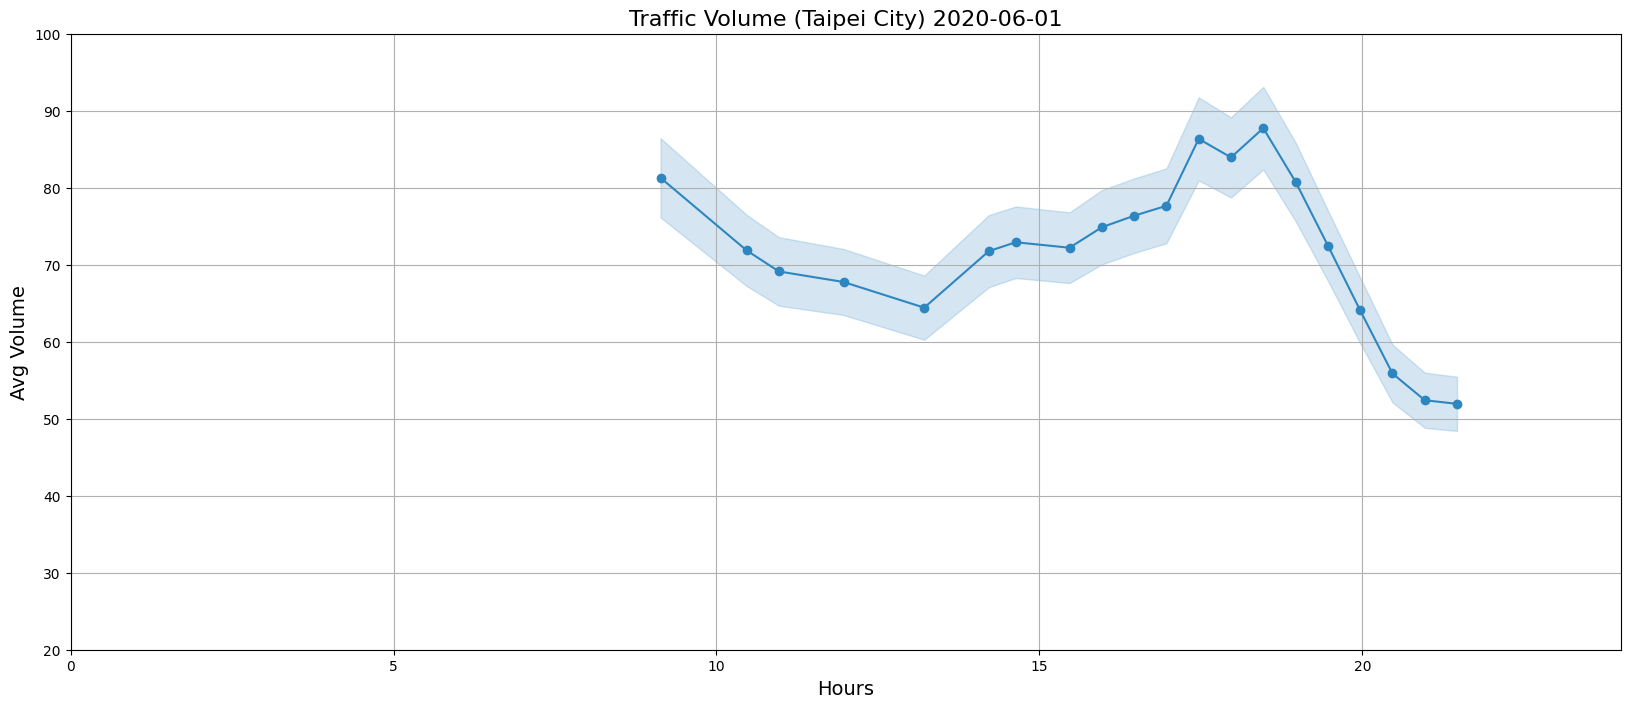

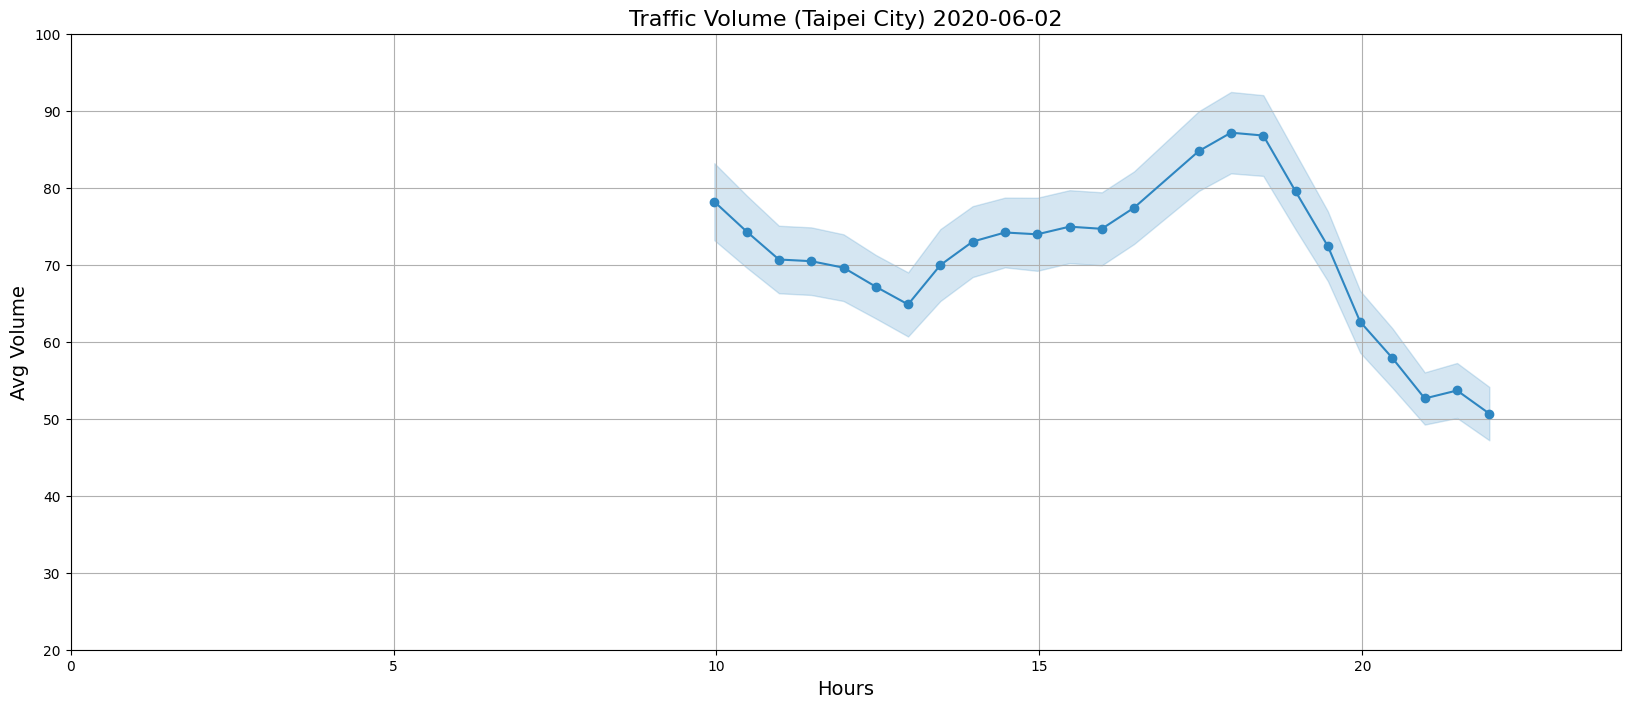

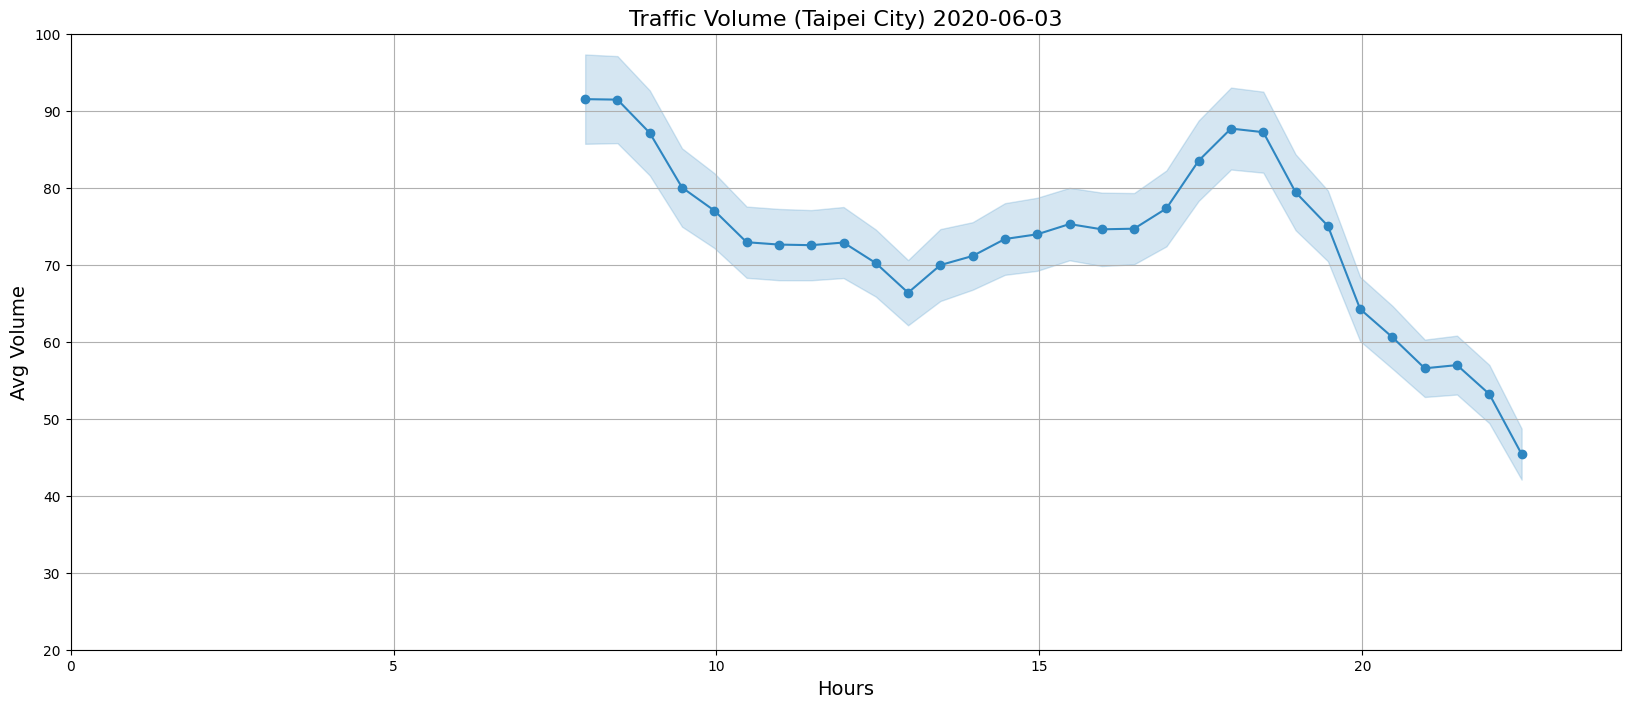

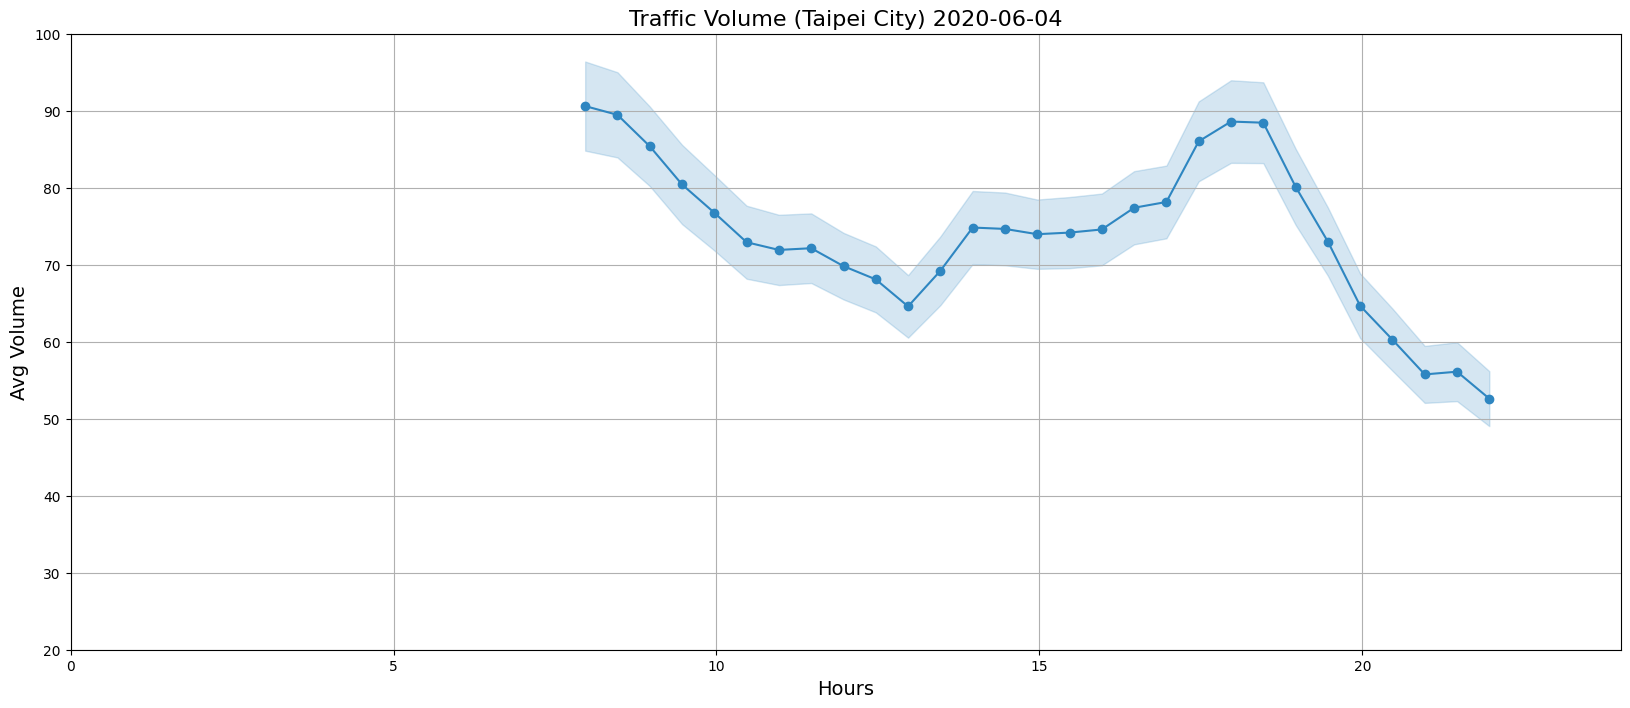

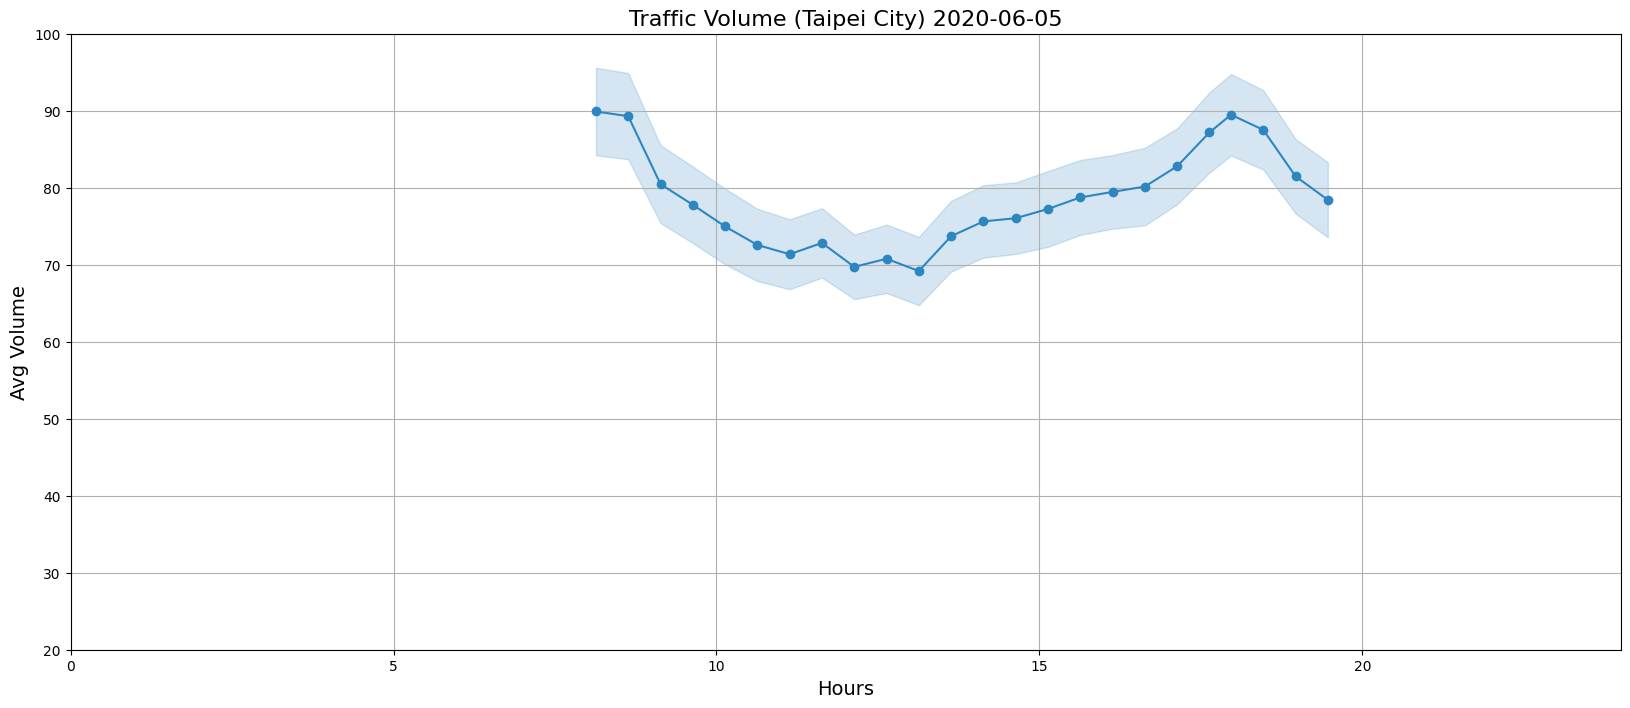

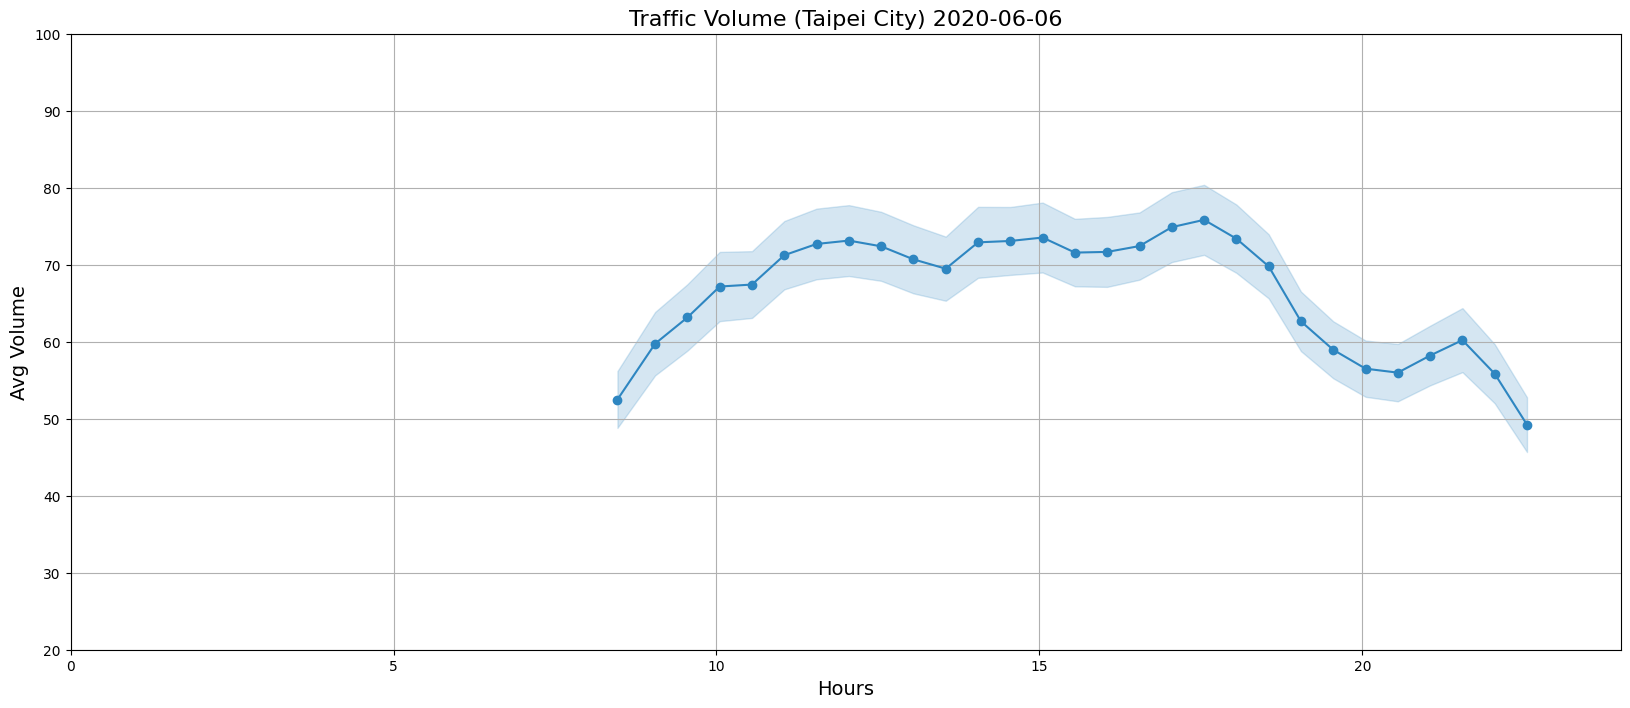

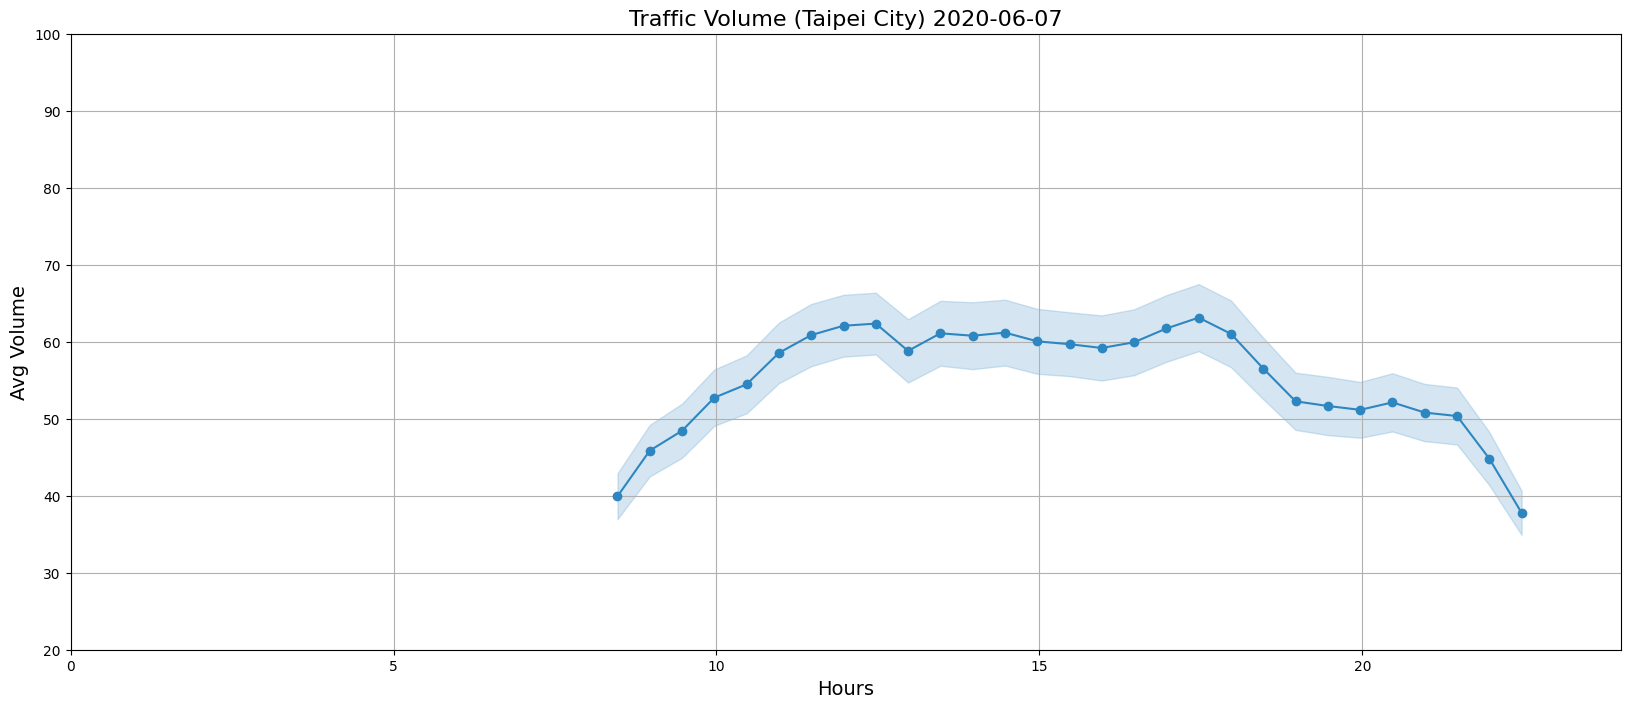

In [3]:
all = []
all.append(totalvolPlot('Traffic_csv/GetVD_06-01.csv', 'Traffic Volume (Taipei City) 2020-06-01'))
all.append(totalvolPlot('Traffic_csv/GetVD_06-02.csv', 'Traffic Volume (Taipei City) 2020-06-02'))
all.append(totalvolPlot('Traffic_csv/GetVD_06-03.csv', 'Traffic Volume (Taipei City) 2020-06-03'))
all.append(totalvolPlot('Traffic_csv/GetVD_06-04.csv', 'Traffic Volume (Taipei City) 2020-06-04'))
all.append(totalvolPlot('Traffic_csv/GetVD_06-05.csv', 'Traffic Volume (Taipei City) 2020-06-05'))
all.append(totalvolPlot('Traffic_csv/GetVD_06-06.csv', 'Traffic Volume (Taipei City) 2020-06-06'))
all.append(totalvolPlot('Traffic_csv/GetVD_06-07.csv', 'Traffic Volume (Taipei City) 2020-06-07'))

In [4]:
with open("../public/data/traffic_all.json", "w") as f:
    json.dump(all, f)